# XGBoost

## Importar las librerías

In [97]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from optimizer import GeneticAlgorithmOptimizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from sklearn.model_selection import learning_curve
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Importar el conjunto de datos

In [81]:
datos = pd.read_csv('HALF_DATA.csv')
X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values

In [82]:
#label encoding y
le = LabelEncoder()
y = le.fit_transform(y)

## División del conjunto de datos en un subconjunto para entrenamiento y otro para pruebas

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Limites para los hiperparametros

In [84]:
param_limits = {
    'n_estimators': (50, 200, 'int'),
    'max_depth': (3, 10, 'int'),
    'learning_rate': (0.01, 0.3, 'float'),
    'subsample': (0.5, 1.0, 'float')
}

## Fitness function para obtener un score númerico

In [85]:
def fitness_function(individual):
    modelo = XGBClassifier(
        n_estimators=individual['n_estimators'],
        max_depth=individual['max_depth'],
        learning_rate=individual['learning_rate'],
        subsample=individual['subsample'],
        use_label_encoder=False,
        eval_metric='logloss'
    )

    puntuacion = cross_val_score(modelo, X_train, y_train, cv=3, scoring='accuracy').mean()
    return puntuacion

## Instancia del optimizador genético

In [92]:
optimizer = GeneticAlgorithmOptimizer(
    param_limits=param_limits,
    fitness_function=fitness_function,
    population_size=10,
    generations=30,
    crossover_rate=0.8,
    mutation_rate=0.2,
    tournament_size=3,
    verbose=True
)

In [93]:
best_params, best_score, scores = optimizer.run()

Generation 1/30
Best score so far: 0.9767
Generation 2/30
Best score so far: 0.9790
Generation 3/30
Best score so far: 0.9790
Generation 4/30
Best score so far: 0.9803
Generation 5/30
Best score so far: 0.9816
Generation 6/30
Best score so far: 0.9816
Generation 7/30
Best score so far: 0.9816
Generation 8/30
Best score so far: 0.9816
Generation 9/30
Best score so far: 0.9816
Generation 10/30
Best score so far: 0.9819
Generation 11/30
Best score so far: 0.9819
Generation 12/30
Best score so far: 0.9819
Generation 13/30
Best score so far: 0.9821
Generation 14/30
Best score so far: 0.9824
Generation 15/30
Best score so far: 0.9824
Generation 16/30
Best score so far: 0.9824
Generation 17/30
Best score so far: 0.9824
Generation 18/30
Best score so far: 0.9824
Generation 19/30
Best score so far: 0.9824
Generation 20/30
Best score so far: 0.9824
Generation 21/30
Best score so far: 0.9824
Generation 22/30
Best score so far: 0.9824
Generation 23/30
Best score so far: 0.9824
Generation 24/30
Bes

In [ ]:
print('Best parameters:', best_params)

Best parameters: {'n_estimators': 148, 'max_depth': 10, 'learning_rate': 0.24790597997177743, 'subsample': 1.0}


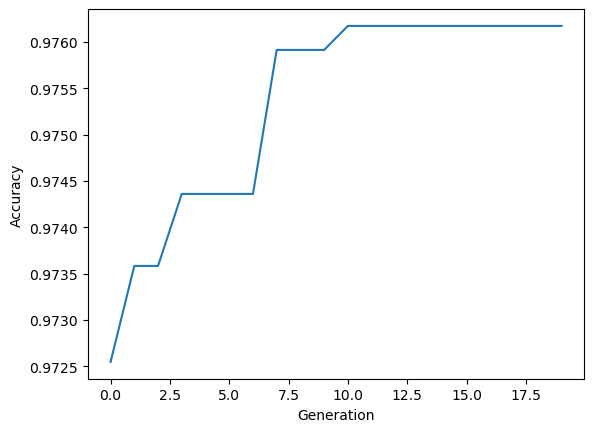

In [ ]:
plt.plot(scores)
plt.ylabel('Accuracy')
plt.xlabel('Generation')
plt
plt.show()

## Modelo con los mejores hiperparámetros

In [ ]:
classifier = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    use_label_encoder=False,
    eval_metric='logloss'
)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.24790597997177743, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=148, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Accuracy score

In [106]:
y_predicciones = classifier.predict(X_test)
accuracy_score(y_test, y_predicciones)

0.9834368530020704

### Matriz de confusión

In [108]:
mat_conf = confusion_matrix(y_test, y_predicciones)
print(mat_conf)

[[42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  2  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  2 31  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  

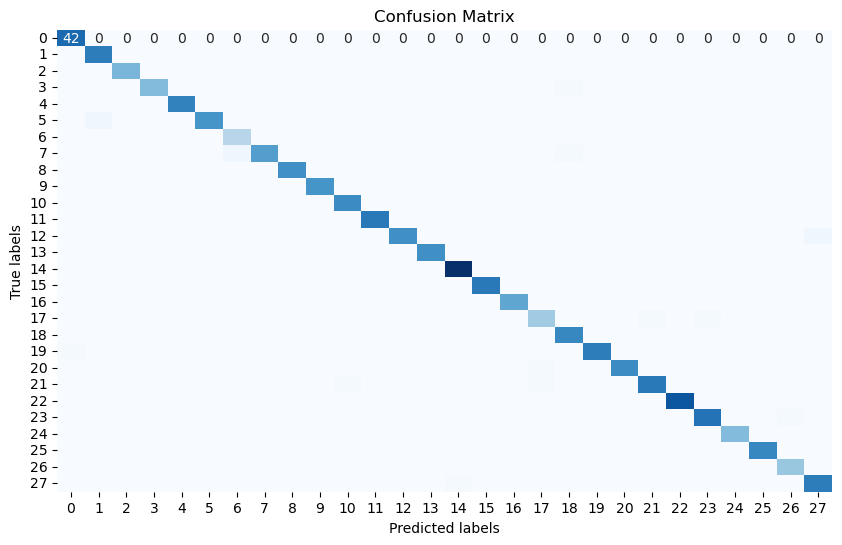

In [109]:
plt.figure(figsize=(10, 6))
sns.heatmap(mat_conf, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 10})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Matriz de confusión normalizada

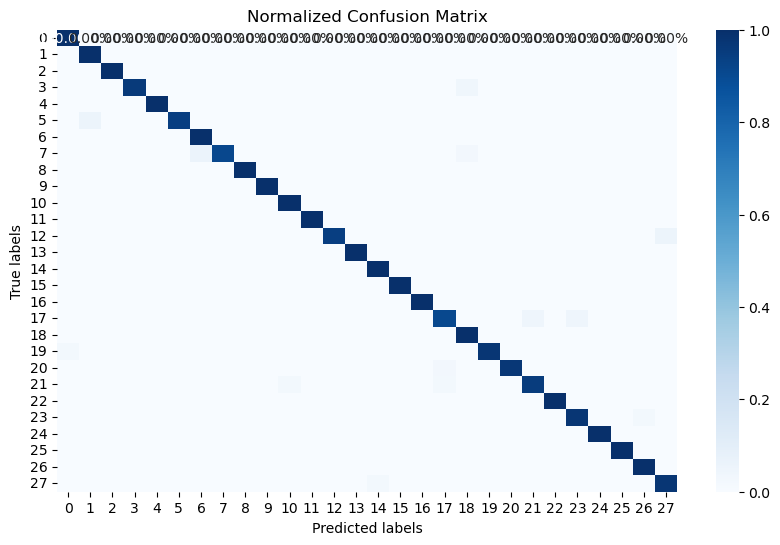

In [110]:
plt.figure(figsize=(10, 6))
sns.heatmap(mat_conf / mat_conf.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Normalized Confusion Matrix")
plt.show()

### Características más relevantes

<Figure size 1000x800 with 0 Axes>

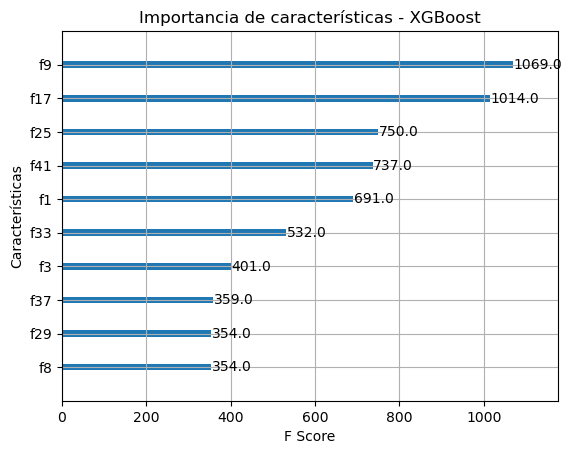

In [ ]:
plt.figure(figsize=(10, 8))
plot_importance(classifier, importance_type='weight', max_num_features=10)
plt.title("Importancia de características - XGBoost")
plt.xlabel("F Score")
plt.ylabel("Características")
plt.show()

### Cross-validation Curve

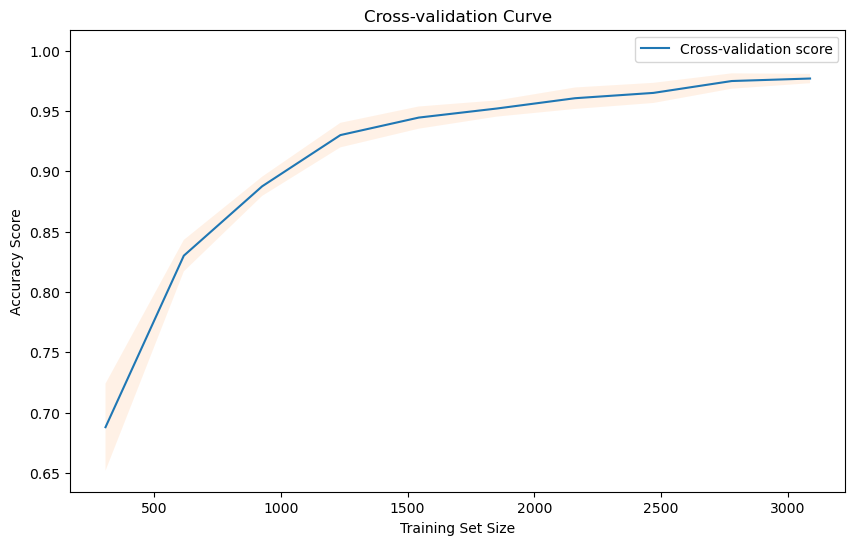

In [112]:
train_sizes, train_scores, test_scores = learning_curve(
    classifier,
    X_train, y_train, cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.title("Cross-validation Curve")
plt.show()
